# Understanding the Data

**Medical Appointment No-Shows Dataset**
- This dataset contains information about medical appointments in Brazil, focusing on whether patients show up for their scheduled appointments. The data includes various patient characteristics, appointment details, and health conditions that might influence attendance patterns.

**Dataset Source:** https://www.kaggle.com/datasets/joniarroba/noshowappointments

**Dataset Description:** This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

**Columns:**
- PatientId: Identification of a patient
- AppointmentID: Identification of each appointment
- Gender: Male or Female
- ScheduledDay: The day of the actuall appointment, when they have to visit the doctor.
- AppointmentDay: The day someone called or registered the appointment, this is before appointment of course.
- Age: How old is the patient.
- Neighbourhood: Where the appointment takes place.
- Scholarship: True of False, if the patient is enrolled in Brasilian welfare program Bolsa Família.
- Hipertension: True or False
- Diabetes: True or False
- Alcoholism: True or False
- Handicap: True or False
- SMS_received: 1 or 0, if the patient received an SMS
- No-show: True or False, if the patient showed up for the appointment

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [3]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


## Function to Add Random Missing Values

In [4]:
# Function to add random missing values
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05.

    Returns:
        df_missing (pd.DataFrame): Processed DataFrame object.
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing


df_with_nan = add_random_missing_values(df,
                                        missing_rate = 0.03)

# Save the new DataFrame with missing values
df_with_nan.to_csv("KaggleV2_with_nan.csv", index=False)

## Data Overview

### Rename Columns

In [5]:
# Rename columns for better clarity and organization
df_with_nan = df_with_nan.rename(columns={
    # Identifiers
    'PatientId': 'patient_id',
    'AppointmentID': 'appointment_id',
    
    # Datetime columns
    'ScheduledDay': 'scheduled_date',
    'AppointmentDay': 'appointment_date',
    
    # Demographics
    'Gender': 'gender',
    'Age': 'age',
    'Neighbourhood': 'neighborhood',
    
    # Health conditions (binary)
    'Hipertension': 'hypertension',
    'Diabetes': 'diabetes',
    'Alcoholism': 'alcoholism',
    'Handcap': 'handicap',
    
    # Other features
    'Scholarship': 'scholarship',
    'SMS_received': 'sms_received',
    'No-show': 'no_show'
})

# Verify the new column names
df_with_nan.columns.tolist()

['patient_id',
 'appointment_id',
 'gender',
 'scheduled_date',
 'appointment_date',
 'age',
 'neighborhood',
 'scholarship',
 'hypertension',
 'diabetes',
 'alcoholism',
 'handicap',
 'sms_received',
 'no_show']

### Dataset Information

In [6]:
# Display the modified DataFrame
df_with_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   patient_id        107314 non-null  float64
 1   appointment_id    107270 non-null  float64
 2   gender            107240 non-null  object 
 3   scheduled_date    107299 non-null  object 
 4   appointment_date  107250 non-null  object 
 5   age               107345 non-null  float64
 6   neighborhood      107183 non-null  object 
 7   scholarship       107175 non-null  float64
 8   hypertension      107345 non-null  float64
 9   diabetes          107297 non-null  float64
 10  alcoholism        107184 non-null  float64
 11  handicap          107300 non-null  float64
 12  sms_received      107180 non-null  float64
 13  no_show           107249 non-null  object 
dtypes: float64(9), object(5)
memory usage: 11.8+ MB


In [7]:
print(f"Shape of the DataFrame: {df_with_nan.shape}")
print(f"Size of the DataFrame: {df_with_nan.size}")

Shape of the DataFrame: (110527, 14)
Size of the DataFrame: 1547378


### Preview of Data

In [9]:
df_with_nan.head()

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903.0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,No
1,5.589978e+14,5642503.0,M,2016-04-29T16:08:27Z,NaN,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,No
2,4.262962e+12,5642549.0,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,No
3,8.679512e+11,5642828.0,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,No
4,8.841186e+12,5642494.0,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,No


In [10]:
df_with_nan.tail()

,patient_id,appointment_id,gender,scheduled_date,appointment_date,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
110522,2.572134e+12,5651768.0,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110523,3.596266e+12,5650093.0,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No
110524,1.557663e+13,5630692.0,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,NaN,No
110525,9.213493e+13,5630323.0,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38.0,MARIA ORTIZ,0.0,0.0,0.0,NaN,0.0,1.0,No
110526,3.775115e+14,5629448.0,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54.0,MARIA ORTIZ,0.0,0.0,0.0,0.0,0.0,1.0,No


## Data Preprocessing



### Handling Date and Time Columns


In [11]:
# Convert datetime strings to datetime objects
df_with_nan['scheduled_date'] = pd.to_datetime(df_with_nan['scheduled_date'], errors='coerce',format='%Y-%m-%dT%H:%M:%SZ')
df_with_nan['appointment_date'] = pd.to_datetime(df_with_nan['appointment_date'], errors='coerce',format='%Y-%m-%dT%H:%M:%SZ')

### Lead Time (Days between scheduled date and appointment date)

In [18]:

df_with_nan['lead_time'] = (df_with_nan['appointment_date'] - df_with_nan['scheduled_date']).dt.total_seconds() / (24 * 60 * 60)  # Convert seconds to days

# Round to 0 if the lead times are negative (small time differences)
df_with_nan['lead_time'] = df_with_nan['lead_time'].apply(lambda x: max(0, x) if pd.notnull(x) else x)

In [19]:
len(df_with_nan.query('lead_time < 0'))

0

### Categorical and Numerical Columns

In [20]:
categorical_columns = ['gender', 'neighborhood','scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap','sms_received', 'no_show']
numerical_columns = ['age','lead_time']

In [21]:

#'appointment_id' and 'patient_id' are not useful for analysis.
# Since we have already calculate the time between scheduled date and appointment date, we don't need 'appointment_date' and 'scheduled_date' columns  
df_with_nan.drop(columns=['appointment_id', 'patient_id','appointment_date', 'scheduled_date'],inplace=True)


### Checking for Outliers


#### age Column



In [24]:
# Checking for negative age values
len(df_with_nan.query('age < 0'))
print(f"There is only {len(df_with_nan.query('age < 0'))} negative value in the age column.")
len(df_with_nan.query('age >= 102'))
print(f"There are only {len(df_with_nan.query('age >= 102'))} outlier values in the age column.")


There is only 1 negative value in the age column.
There are only 7 outlier values in the age column.


In [25]:
# We assume that it is not possible to have a person older than 102 years.
# So we drop the rows with age greater than 102 and negative age values.
df_with_nan = df_with_nan[df_with_nan['age'].isna() | ((df_with_nan['age'] >= 0) & (df_with_nan['age'] < 102))]
df_with_nan.shape

(110519, 11)

### Exploring Missing Values

#### Missing Values heat map


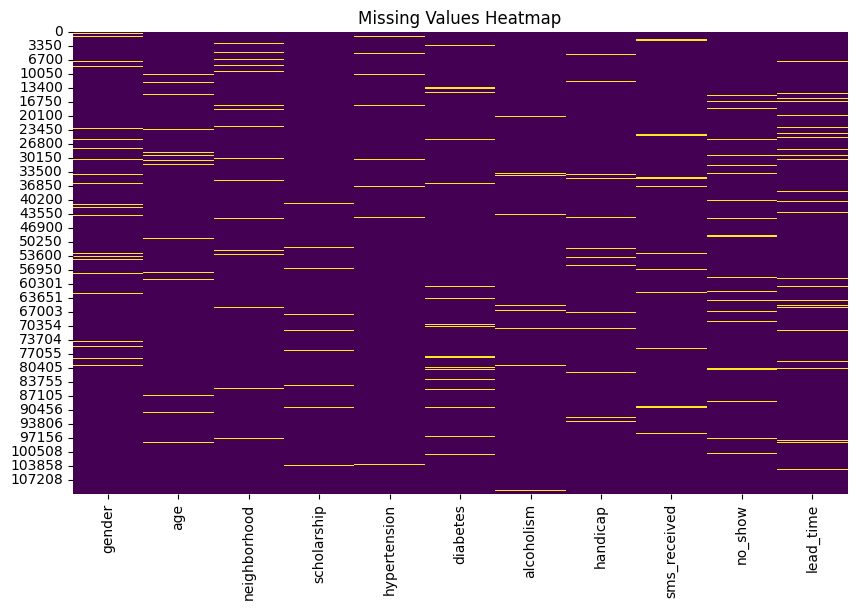

In [29]:

plt.figure(figsize=(10, 6))
sns.heatmap(df_with_nan.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

#### Rows with more than 50% Missing Values

In [30]:
# Calculate the percentage of missing values for each row
missing_percentage_per_row = df_with_nan.isnull().sum(axis=1) / df_with_nan.shape[1] * 100

# Count rows with >= 50% missing values
rows_missing_50_percent = missing_percentage_per_row[missing_percentage_per_row >= 50]

print(f"Number of rows with >= 50% missing values: {len(rows_missing_50_percent)}")

Number of rows with >= 50% missing values: 0



age:
Mean: 37.09
Median: 37.00
Skewness: 0.120
Distribution type: approximately symmetric

lead_time:
Mean: 9.86
Median: 3.46
Skewness: 2.712
Distribution type: positively skewed


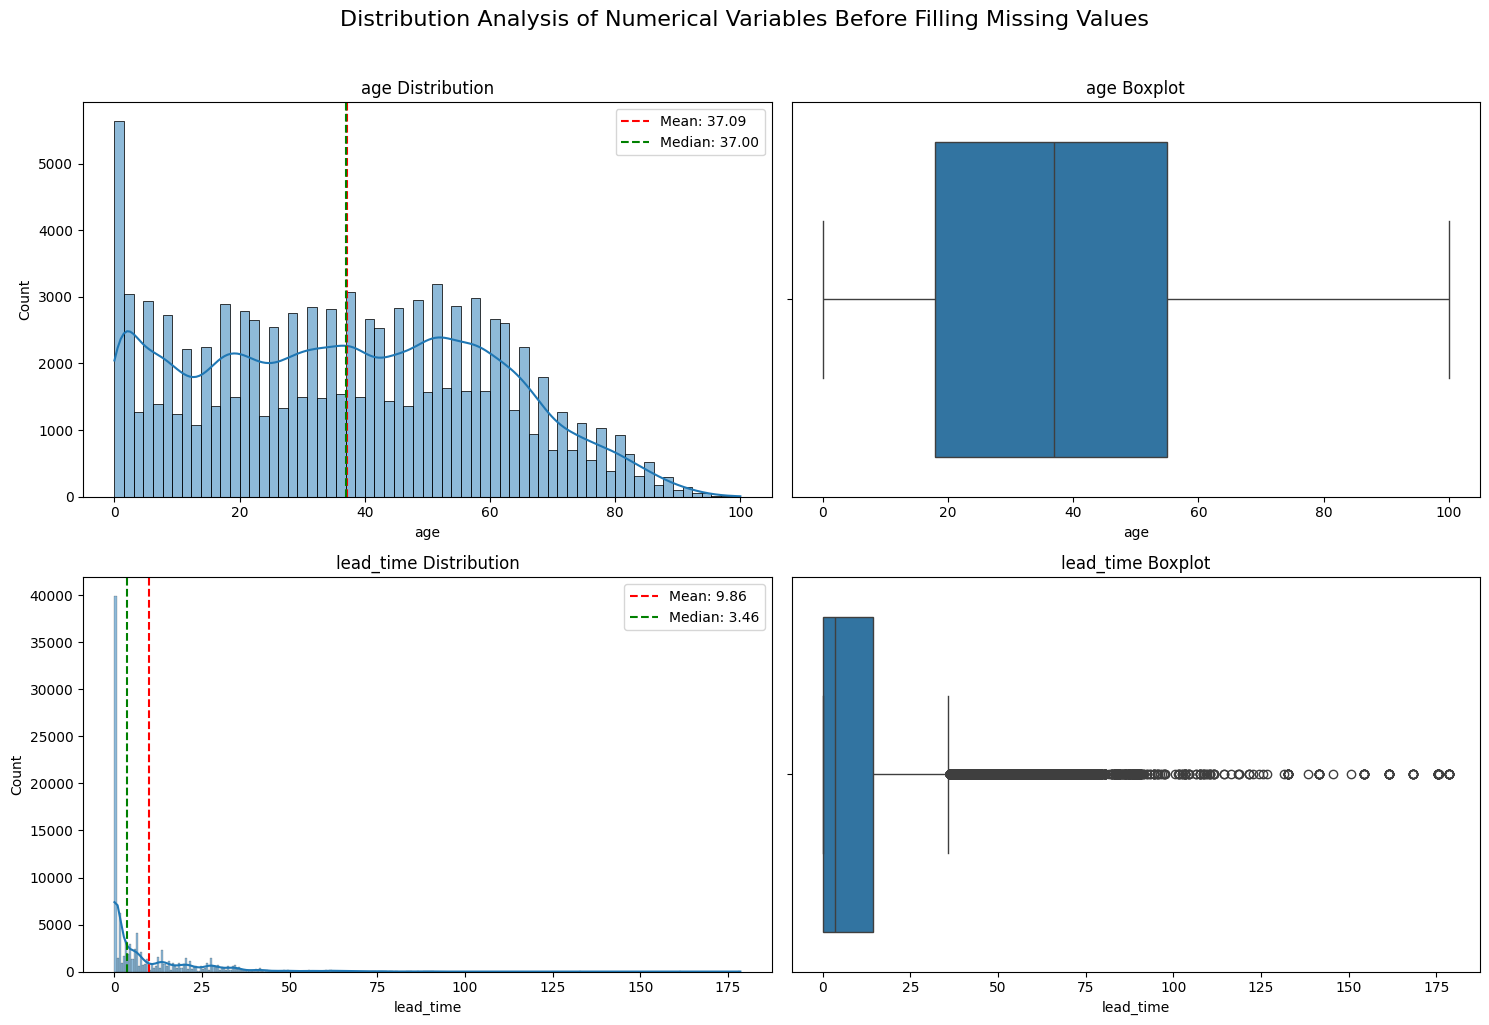

In [36]:
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(15, 5*len(numerical_columns)))
fig.suptitle('Distribution Analysis of Numerical Variables Before Filling Missing Values', fontsize=16, y=1.02)

for idx, col in enumerate(numerical_columns):
    # Calculate statistics
    mean_val = df_with_nan[col].mean()
    median_val = df_with_nan[col].median()
    
    # Histogram
    sns.histplot(data=df_with_nan, x=col, kde=True, ax=axes[idx, 0])
    # Add vertical lines for mean and median
    axes[idx, 0].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[idx, 0].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[idx, 0].legend()
    axes[idx, 0].set_title(f'{col} Distribution')
    
    # Boxplot
    sns.boxplot(data=df_with_nan, x=col, ax=axes[idx, 1])
    axes[idx, 1].set_title(f'{col} Boxplot')
    
    # Calculate skewness
    skewness = df_with_nan[col].skew()
    
    # Interpret skewness
    if abs(skewness) < 0.5:
        skew_type = "approximately symmetric"
    elif skewness < 0:
        skew_type = "negatively skewed"
    else:
        skew_type = "positively skewed"
    
    print(f"\n{col}:")
    print(f"Mean: {mean_val:.2f}")
    print(f"Median: {median_val:.2f}")
    print(f"Skewness: {skewness:.3f}")
    print(f"Distribution type: {skew_type}")

plt.tight_layout()
plt.show()

**Interpretation of the distribution of the numerical variables before filling missing values:**

**Age Distribution:**
The histogram shows a right-skewed (positively skewed) distribution
However mean and median are close to each other, so it is approximately symmetric.
Skewness value is 0.120.

Most patients are younger (concentrated on the left).
There's a long tail extending to older ages.
The median age is 37 years.
There are some outlier patients at very high ages.




**Lead Time Distribution:**
The histogram shows a heavily right-skewed (positively skewed) distribution
The boxplot shows numerous outliers on the right side
Skewness value is strongly positive (2.712)
This means:
Most appointments are scheduled with short lead times (days between scheduling and appointment)
There are some appointments scheduled very far in advance (creating the long right tail)
Median and mean are different, so it is not symmetric.
There are outlier cases where appointments were scheduled months in advance.


### Filling Missing Values in Age and Lead Time Columns



In [37]:
# 1. Age - Since it's moderately skewed, we'll use median
# Median is less sensitive to outliers than mean, so it's a better choice for this skewed distribution.
# It preserves the central tendency of the data.
df_with_nan['age'] = df_with_nan['age'].fillna(df_with_nan['age'].median())

# 2. Lead Time - Due to heavy skewness, we'll use a more robust approach
# Calculate the mode for small lead times (more common scenario)
# Most appointments have short lead times
# Mean would be pulled by outliers
# Median might still be too high
#Mode represents the most typical behavior
most_common_lead_time = df_with_nan['lead_time'].mode()[0]
df_with_nan['lead_time'] = df_with_nan['lead_time'].fillna(most_common_lead_time)

# Verify the results
print("Missing values after imputation:")
print(df_with_nan[['age', 'lead_time']].isnull().sum())

# Optional: Display summary statistics after imputation
print("\nSummary statistics after imputation:")
print(df_with_nan[['age', 'lead_time']].describe())

Missing values after imputation:
age          0
lead_time    0
dtype: int64

Summary statistics after imputation:
                 age      lead_time
count  110519.000000  110519.000000
mean       37.087940       9.285279
std        22.775738      14.879031
min         0.000000       0.000000
25%        18.000000       0.000000
50%        37.000000       2.479201
75%        55.000000      13.520035
max       100.000000     178.554873


### Gender Analysis and Imputation



#### Age & No-show Analysis


In [40]:
age_labels = ['Young', 'Young Adult', 'Adult', 'Senior']
df_with_nan['age_group'], bins = pd.qcut(df_with_nan['age'],
                                q=4,
                                labels = age_labels,
                                retbins=True)

print("Age group boundaries:")
for i in range(len(age_labels)):
    print(f"{age_labels[i]}: {bins[i]:.1f} to {bins[i+1]:.1f} years")

Age group boundaries:
Young: 0.0 to 18.0 years
Young Adult: 18.0 to 37.0 years
Adult: 37.0 to 55.0 years
Senior: 55.0 to 100.0 years



Detailed statistics by age group:
                       no_show                      
            Total Appointments No-shows No-show Rate
age_group                                           
Young                    27224     5982        21.34
Young Adult              28748     6622        22.34
Adult                    25330     4952        18.96
Senior                   25939     4084        15.28


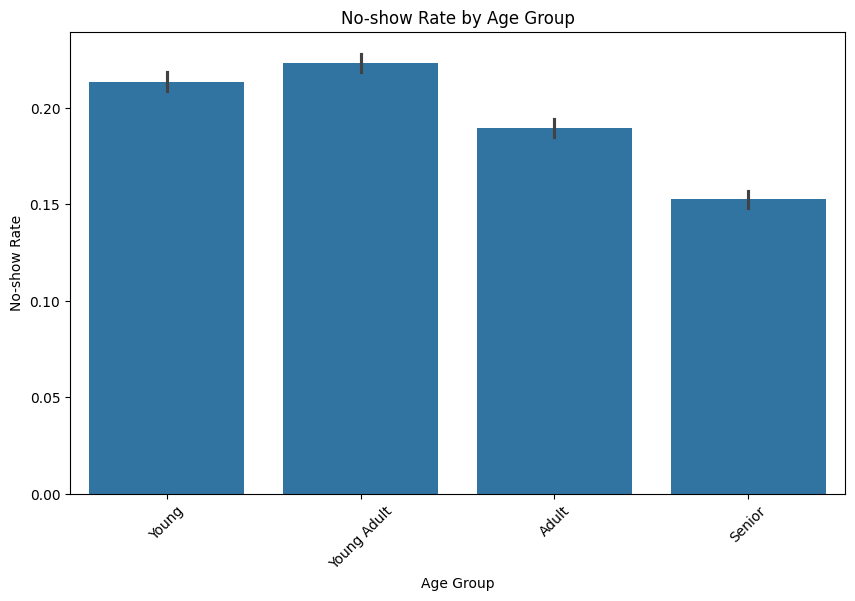

In [41]:
# 1. Detailed Statistics
detailed_stats = df_with_nan.groupby('age_group').agg({
    'no_show': [
        ('Total Appointments', 'count'),
        ('No-shows', lambda x: (x == 'Yes').sum()),
        ('No-show Rate', lambda x: (x == 'Yes').mean() * 100)
        ]
    }).round(2)

print("\nDetailed statistics by age group:")
print(detailed_stats)

# 2. Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(data=df_with_nan, x='age_group', y=(df_with_nan['no_show'] == 'Yes').astype(int))
plt.title('No-show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No-show Rate')
plt.xticks(rotation=45);

**Interpretation of the relationship between age groups and no-show rates:**

'Young' and 'Young Adult' groups show higher no-show rates.
This suggests that younger patients might be less reliable in keeping their appointments.
'Adult' and 'Senior' groups have lower no-show rates, indicating better adherence to appointments.



#### Gender & Health Conditions Analysis

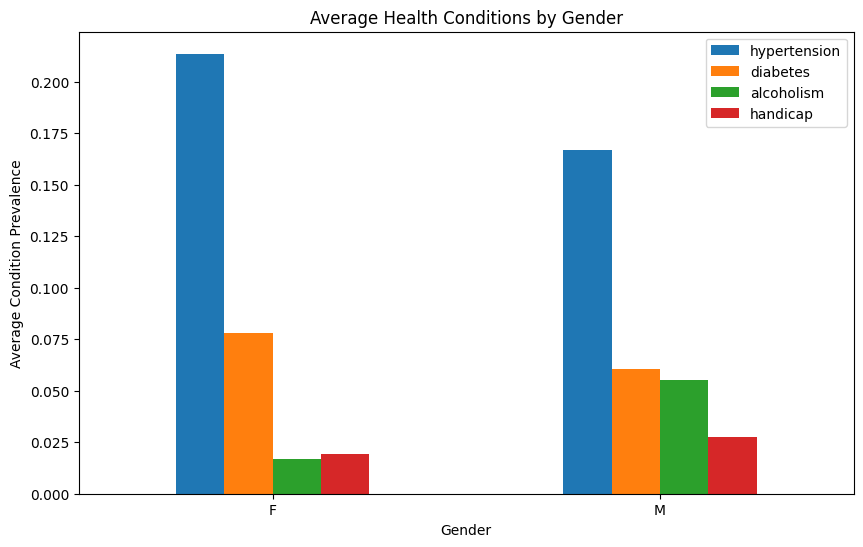

In [43]:
comparison_cols = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
df_with_nan.groupby('gender')[comparison_cols].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Health Conditions by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Condition Prevalence')
plt.xticks(rotation=0);



**Hypertension**:
 - Slightly higher in females (~0.20 or 20%)
 - Lower in males (~0.18 or 18%)
 - Small gender difference of about 2%

**Diabetes**:
 - Similar rates between genders
 - Both around 0.07 (7%)
 - Very slight difference

**Alcoholism**:
 - Notable gender difference
 - Higher in males (~0.10 or 10%)
 - Lower in females (~0.05 or 5%)
 - Males show about twice the rate of alcoholism

**Handicap**:
Very similar between genders
Both around 0.02 (2%)
Lowest prevalence among all conditions

**Key Insights:**
 - Most significant gender difference is in alcoholism rates
 - Hypertension is the most common condition for both genders
 - Handicap is the least common condition for both genders
 - Except for alcoholism, health conditions are fairly similar between genders


This suggests that when imputing missing gender values, alcoholism might be the most useful health indicator, while the other conditions wouldn't be as reliable for predicting gender.

**Gender-based differences in health conditions:**

Except for alcoholism, it is hard to rely on diseases to fill in the missing values in gender column.


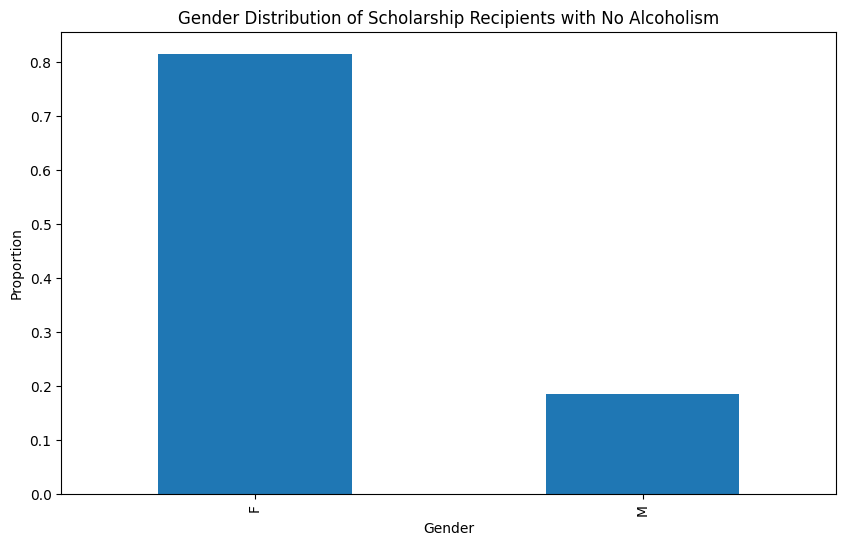

In [46]:
df_with_nan[(df_with_nan['alcoholism']==0.0) & (df_with_nan['scholarship']==1.0)]['gender'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 6))

plt.title('Gender Distribution of Scholarship Recipients with No Alcoholism')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()


#### Imputing Gender Column



In [47]:
# Fill missing values based on the scholarship and alcoholism conditions
condition = (df_with_nan['alcoholism'] == 0.0) & (df_with_nan['scholarship'] == 1.0)
df_with_nan.loc[df_with_nan['gender'].isna() & condition, 'gender'] = 'F'
df_with_nan.loc[df_with_nan['gender'].isna() & ~condition, 'gender'] = 'M'

### Imputation of Remaining Missing Values



In [51]:
# First, let's see which columns have missing values
print("Columns with missing values:")
print(df_with_nan.isna().sum())

# Create a copy of the original dataframe to work with
df_to_impute = df_with_nan.copy()

# Initialize label encoders for categorical columns
le_dict = {}
categorical_cols = ['neighborhood']

# Encode categorical variables
for col in categorical_cols:
    le_dict[col] = LabelEncoder()
    # Only encode non-null values first
    mask = df_to_impute[col].notna()
    df_to_impute.loc[mask, col] = le_dict[col].fit_transform(df_to_impute.loc[mask, col])

# Encode no_show column separately
df_to_impute['no_show'] = df_to_impute['no_show'].map({'No': 0, 'Yes': 1})

# Specify columns for imputation
columns_for_imputation = [
    'scholarship', 'hypertension', 'diabetes', 
    'alcoholism', 'handicap', 'sms_received', 
    'neighborhood', 'no_show'
]

# Create and fit the imputer
imputer = IterativeImputer(random_state=42, max_iter=10)
imputed_data = imputer.fit_transform(df_to_impute[columns_for_imputation])

# Create DataFrame with imputed values, using the same index as original
df_imputed = pd.DataFrame(
    imputed_data, 
    columns=columns_for_imputation,
    index=df_to_impute.index
)

# Round and convert binary columns to integers
binary_cols = ['scholarship', 'hypertension', 'diabetes', 
               'alcoholism', 'sms_received']
for col in binary_cols:
    df_imputed[col] = df_imputed[col].round().astype(int)

# Handle handicap separately (as it's not binary)
df_imputed['handicap'] = df_imputed['handicap'].round().astype(int)

# Handle no_show column separately
df_imputed['no_show'] = df_imputed['no_show'].round().astype(int)


# Convert neighborhood back to original labels
df_imputed['neighborhood'] = le_dict['neighborhood'].inverse_transform(df_imputed['neighborhood'].round().astype(int))

# Fill NaN values in original dataframe
for col in columns_for_imputation:
    # Get only the imputed values where original had NaN
    nan_mask = df_with_nan[col].isna()
    df_with_nan.loc[nan_mask, col] = df_imputed.loc[nan_mask, col]

# Verify the results
print("\nMissing values after imputation:")
print(df_with_nan.isna().sum())

Columns with missing values:
gender          0
age             0
neighborhood    0
scholarship     0
hypertension    0
diabetes        0
alcoholism      0
handicap        0
sms_received    0
no_show         0
lead_time       0
age_group       0
dtype: int64

Missing values after imputation:
gender          0
age             0
neighborhood    0
scholarship     0
hypertension    0
diabetes        0
alcoholism      0
handicap        0
sms_received    0
no_show         0
lead_time       0
age_group       0
dtype: int64


### Data Type Conversion

#### Convert no_show to binary


In [59]:
#### Convert no_show to binary
df_with_nan['no_show'] = df_with_nan['no_show'].map({'No': 0, 'Yes': 1})
df_with_nan['no_show'].value_counts()

no_show
0    88879
1    21640
Name: count, dtype: int64

#### Float to Int

In [60]:
# List of columns to convert from float to int
float_columns = ['age','lead_time','scholarship','hypertension','diabetes','alcoholism','handicap','sms_received']

# Convert float columns to int
for col in float_columns:
    df_with_nan[col] = df_with_nan[col].round().astype(int)

# Verify the changes
print("\nColumn types after conversion:")
print(df_with_nan[float_columns].dtypes)


Column types after conversion:
age             int64
lead_time       int64
scholarship     int64
hypertension    int64
diabetes        int64
alcoholism      int64
handicap        int64
sms_received    int64
dtype: object


#### Gender Column Encoding

In [61]:
# First, let's see what values we currently have
print("Current gender values:")
print(df_with_nan.gender.value_counts())

# Now encode gender properly
df_with_nan['gender'] = df_with_nan['gender'].map({'F': 1, 'M': 0})

# Verify the encoding
print("\nGender value counts after encoding:")
print(df_with_nan['gender'].value_counts())
print("\nGender dtype:", df_with_nan['gender'].dtype)

Current gender values:
gender
F    70000
M    40519
Name: count, dtype: int64

Gender value counts after encoding:
gender
1    70000
0    40519
Name: count, dtype: int64

Gender dtype: int64


## Data Visualization and Analysis


### Univariate Analysis


#### Categorical Variables Distribution


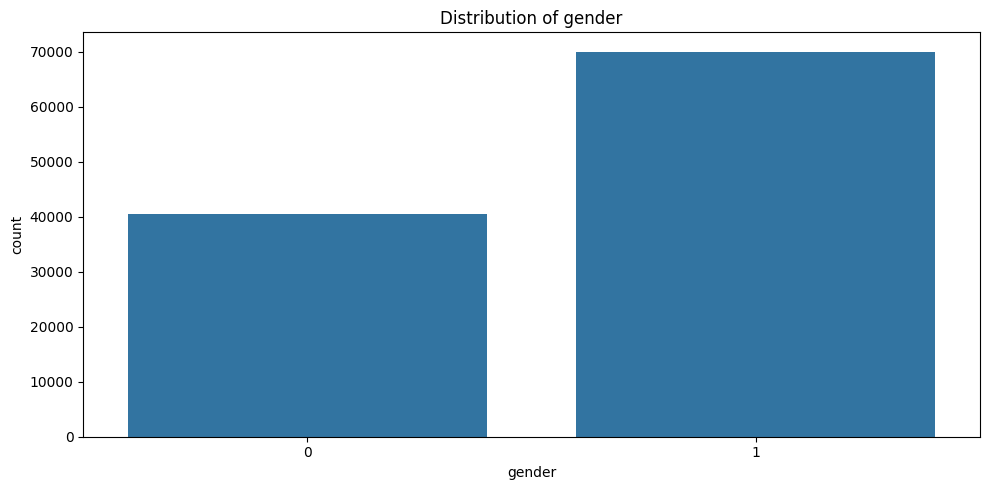

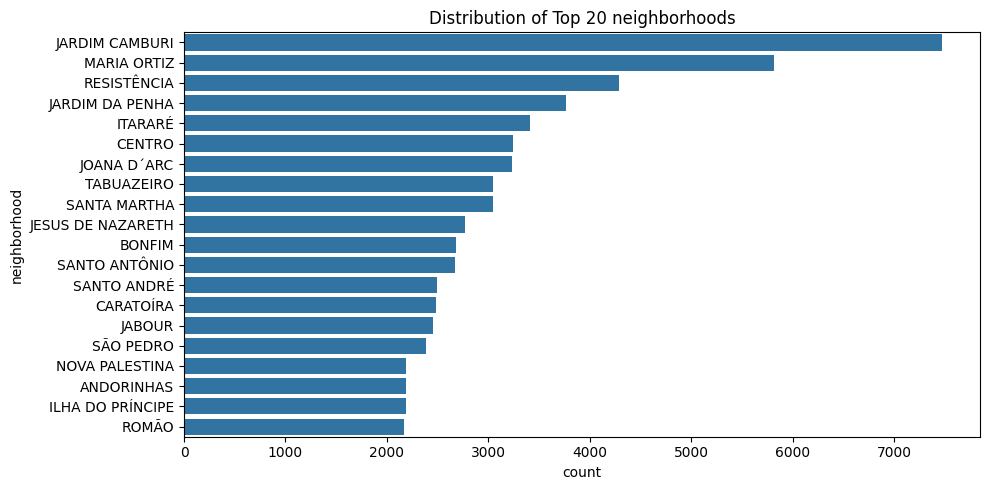

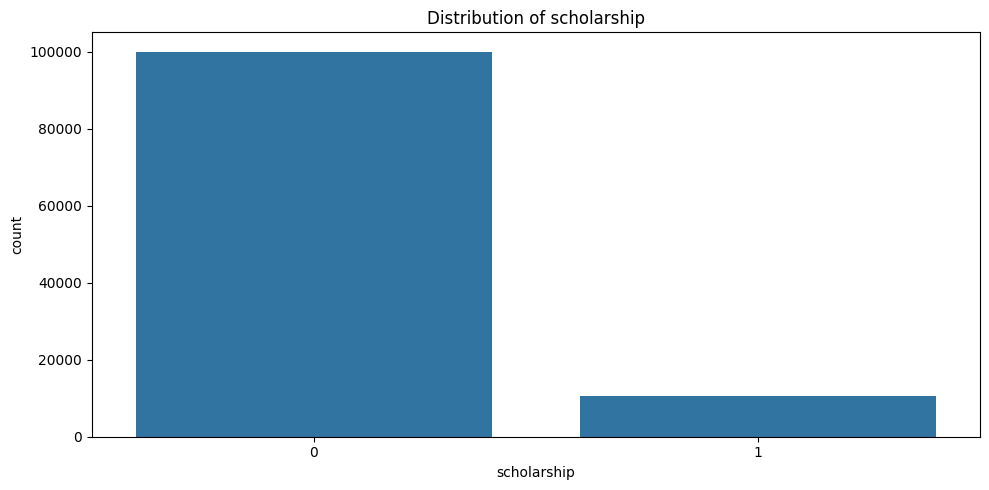

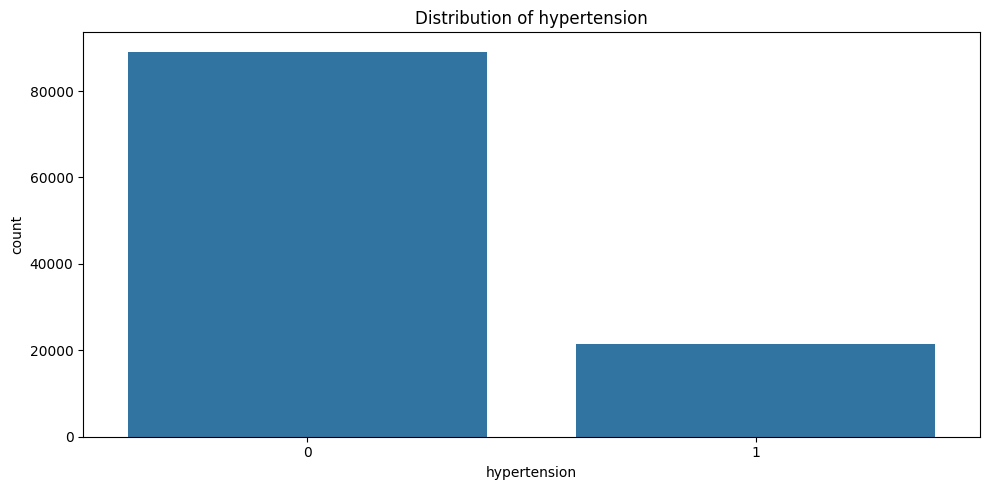

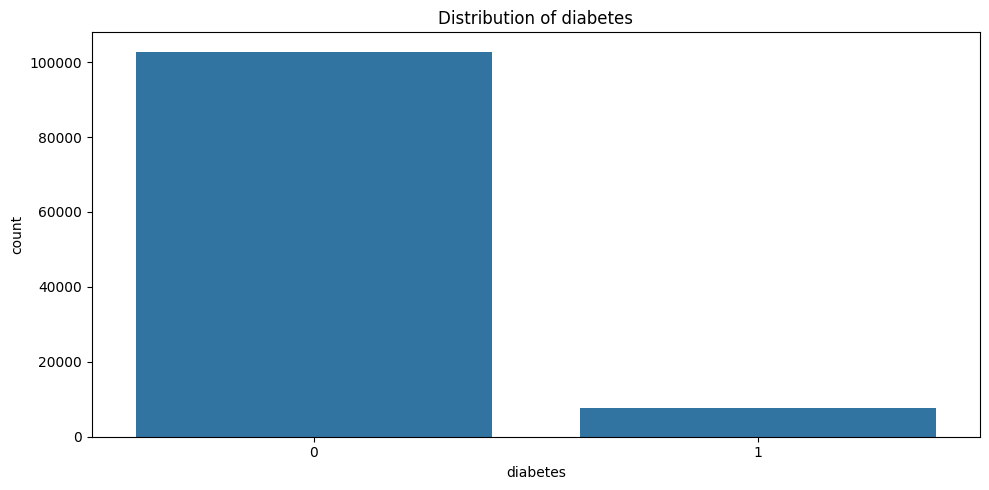

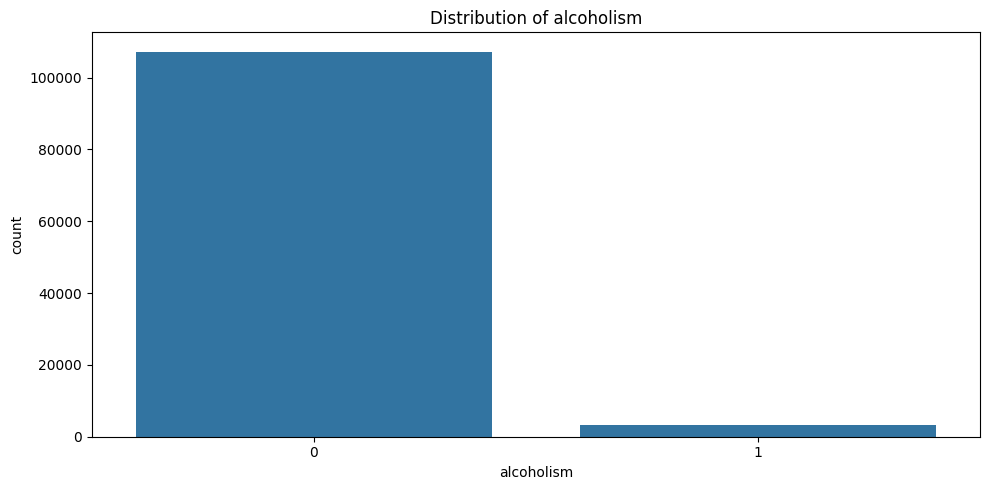

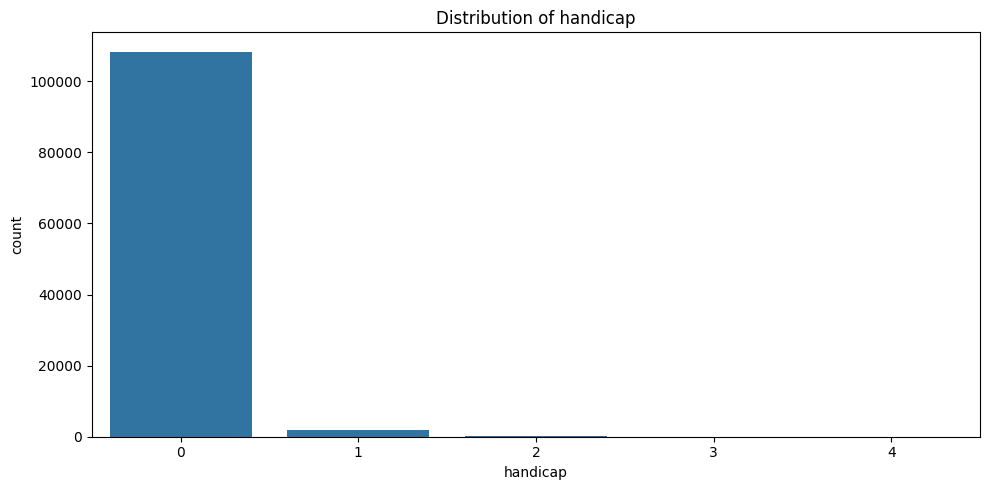

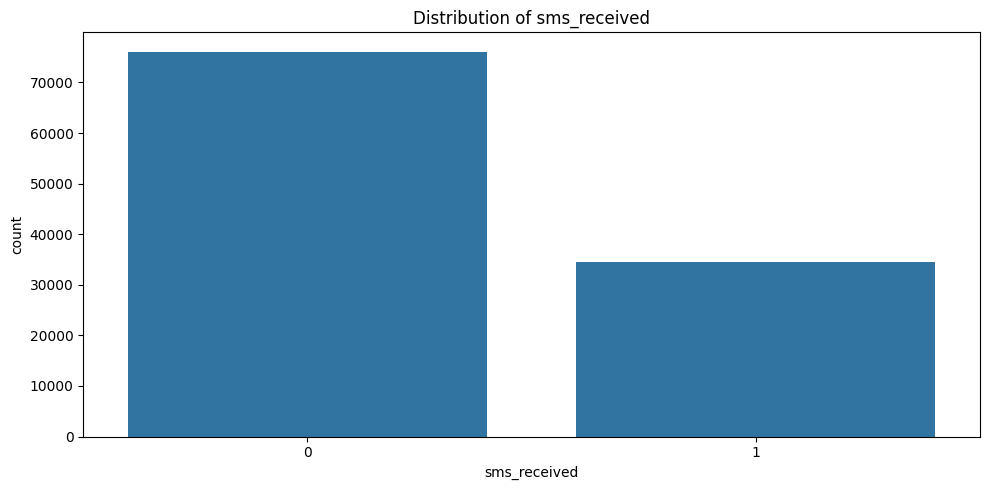

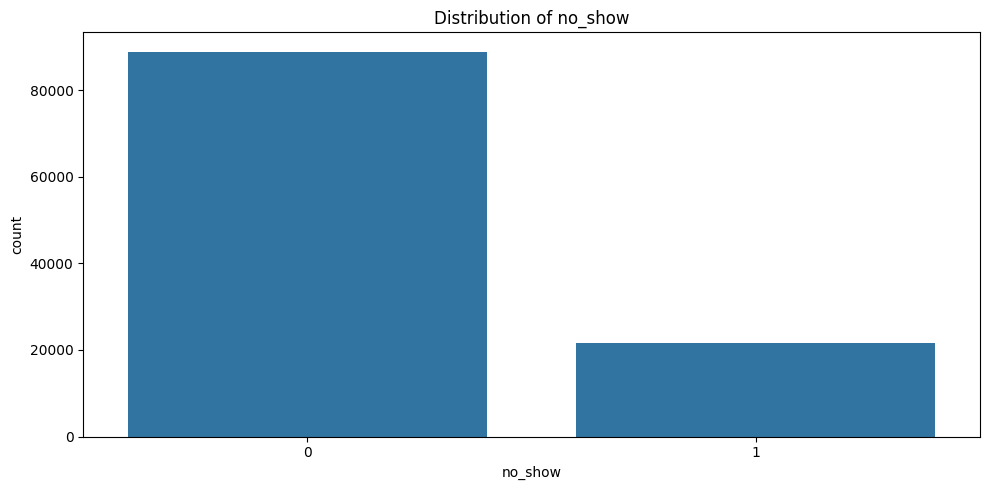

In [64]:
# Create countplots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    if col == 'neighborhood':
        top_20_neighborhoods = df_with_nan[col].value_counts().nlargest(20)
        sns.countplot(y=col, data=df_with_nan[df_with_nan[col].isin(top_20_neighborhoods.index)],
                     order=top_20_neighborhoods.index)
        plt.title(f'Distribution of Top 20 {col}s')
        plt.xticks(rotation=0)
    else:
        sns.countplot(x=col, data=df_with_nan)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

**Interpretation of the distribution of the categorical variables:**

**Gender:**
The distribution is imbalanced, with more females (65%) than males (35%).

**Neighborhood:**
The distribution shows a high concentration of appointments in specific neighborhoods, with a few having very low counts.
This could indicate population density or healthcare facility distribution.

**Scholarship:**
The distribution is imbalanced, with more non-scholarship recipients (90%) than scholarship recipients (10%).

**Health Conditions:**
The distributions for hypertension, diabetes, alcoholism, and handicap are imbalanced, with many patients not having these conditions.

**Handicap:**
Most patients are not handicapped (95%).

**SMS Received:**
The distribution is imbalanced, with more patients not receiving SMS (85%) than receiving SMS (15%).

**No-show:**
The distribution is imbalanced, with more patients not missing appointments (80%) than missing appointments (20%).


### Bivariate Analysis


#### Correlation Matrix


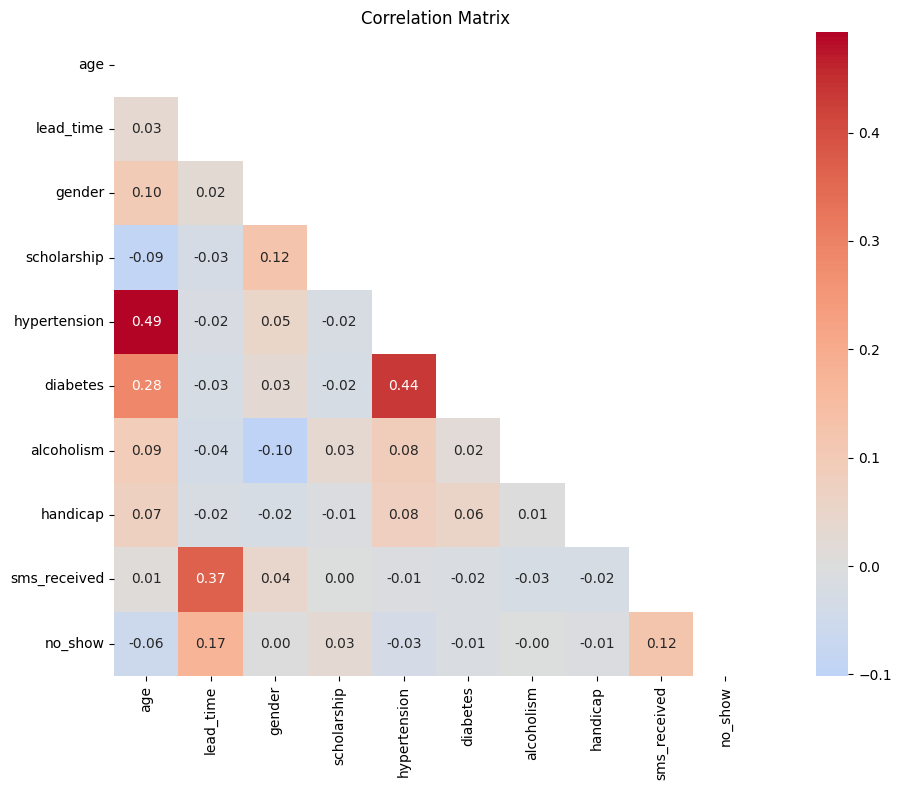

In [68]:
# Updated correlation matrix including no_show
binary_cols = ['gender', 'scholarship', 'hypertension', 'diabetes', 
               'alcoholism', 'handicap', 'sms_received', 'no_show']
correlation_cols = numerical_columns + binary_cols

# Calculate correlation matrix
corr_matrix = df_with_nan[correlation_cols].corr()

# Create mask for lower triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            mask=mask,           # Add mask for upper triangle
            annot=True,          # Show correlation values
            cmap='coolwarm',     # Color scheme
            center=0,            # Center the colormap at 0
            fmt='.2f',          # Round to 2 decimal places
            square=True)        # Make the plot square-shaped
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**Interpretation of the correlation matrix:**

**Strong to Moderate Correlations (|r| > 0.05):**

**sms_received and no_show (positive correlation)**
- Surprisingly patients who received SMS are more likely to miss their appointments.
- This might indicate that SMS reminders were implemented for patients with a history of missing appointments.

**lead_time and no_show (negative correlation)**
- Longer waiting times between scheduling and appointment date increase no-show probability
- Suggests that appointments scheduled far in advance are more likely to be missed
- Could be due to patients forgetting or circumstances changing

**Weak Correlations (0.02 < |r| < 0.05):**

**age and no_show (negative correlation)**
- Younger patients are slightly more likely to no-show
- Older patients tend to be more reliable in keeping appointments

**scholarship and no_show (positive correlation)**
- Patients with scholarships have a slightly higher tendency to no-show
- Might reflect socioeconomic factors or lack of access to healthcare

**Very Weak or Negligible Correlations (|r| < 0.02):**
**Health Conditions** (hypertension, diabetes, alcoholism):
Very weak correlations with no-show behavior
Suggests that having these conditions doesn't strongly influence appointment attendance
**Gender**:
Minimal correlation with no-show rates
Gender doesn't appear to be a significant factor in appointment attendance

_Key Insights:_

1. The strongest predictors of no-shows are:
- SMS reminders (positive correlation)
- Lead time (positive correlation)
- Age (negative correlation)
  
2. Potential recommendations:
- Reduce appointment lead times where possible
- Review the SMS reminder system effectiveness
- Consider additional support for younger patients
- Implement different strategies for long-lead-time appointments

3. Surprising findings:
- The positive correlation with SMS_received suggests the current reminder system might need review
- Health conditions have minimal impact on attendance
- Demographic factors (gender) play minimal role

#### No Show & Categorical Variables


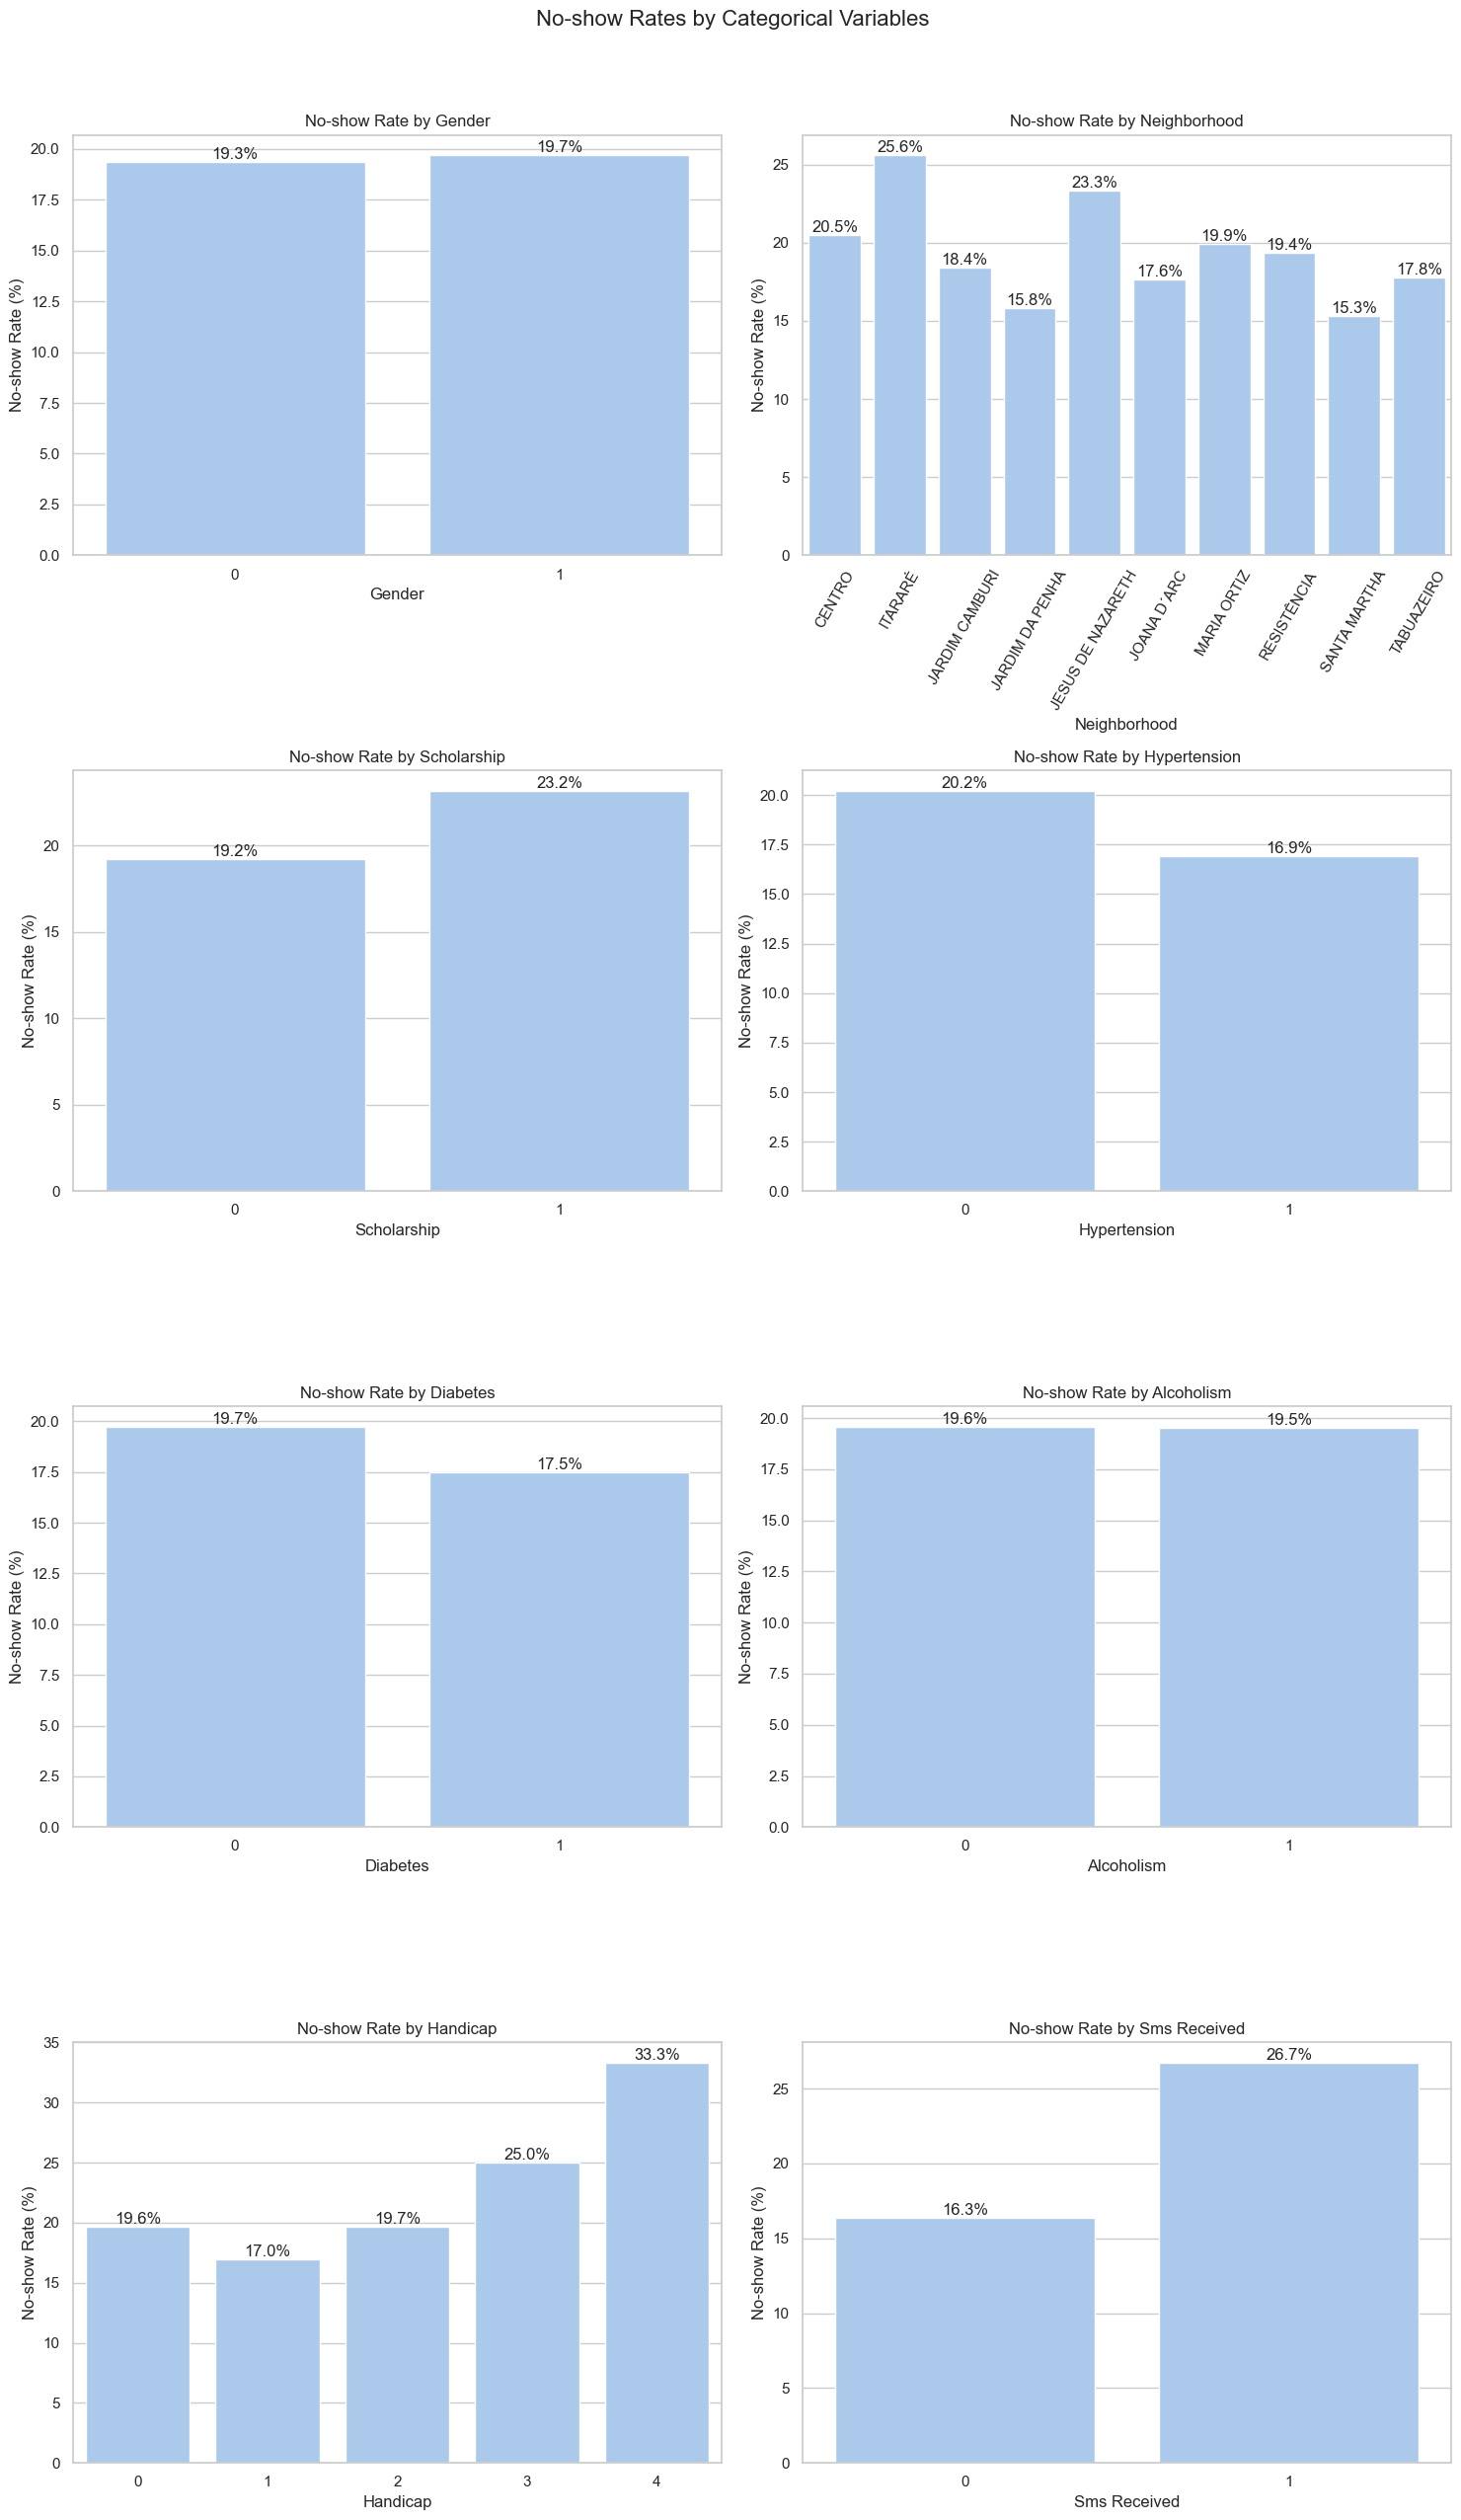

In [85]:
# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 25))
fig.suptitle('No-show Rates by Categorical Variables', fontsize=16, y=1.02)

# Flatten axes for easier iteration
axes = axes.flatten()

for idx, col in enumerate(categorical_columns):
    # Calculate no-show rates for each category
    if col == 'neighborhood':
        top_10_neighborhoods = df_with_nan[col].value_counts().nlargest(10)
        no_show_rates = df_with_nan[df_with_nan[col].isin(top_10_neighborhoods.index)].groupby(col)['no_show'].mean() * 100
    elif col == 'no_show':
        continue
    else:
        no_show_rates = df_with_nan.groupby(col)['no_show'].mean() * 100
    
    # Create bar plot
    sns.barplot(x=no_show_rates.index, y=no_show_rates.values, ax=axes[idx])
    
    # Customize plot
    axes[idx].set_title(f'No-show Rate by {col.replace("_", " ").title()}')
    axes[idx].set_ylabel('No-show Rate (%)')
    axes[idx].set_xlabel(col.replace("_", " ").title())
    
    if col == 'neighborhood':
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    
    # Add value labels on top of bars
    for i, v in enumerate(no_show_rates.values):
        axes[idx].text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# Remove empty subplots if any
for idx in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
sns.set_theme(style="whitegrid", palette="colorblind") 
plt.show()


**No-show Rates by Categorical Variables Analysis**
- Interesting to see that sms receivers tend to have higher no-show rates.
- Higher handicap degree also have higher no-show rates.
- No significant difference between diseases and no-show rates.
- Genders have equal no-show rates.
- Itarare and jesus de maria neighborhoods have the highest no-show rates, other neighborhoods have similar no-show rates.

**Key Findings:**

**Handicap Impact:**
- Patients with higher handicap degree generally show better attendance
- This might indicate that more serious health conditions lead to better appointment adherence

**Unexpected Patterns:**
- SMS reminders associated with higher no-show rates
- Scholarship recipients more likely to miss appointments

**Demographic Variations:**
- Gender differences are minimal
- Socioeconomic factors (scholarship status) show stronger correlation with attendance
- Implications for Healthcare Management
- Focus additional follow-up on scholarship recipients
- Investigate why SMS reminders aren't reducing no-show rates
- Consider special attention for patients without chronic conditions

### Multivariate Analysis



<Figure size 1500x1000 with 0 Axes>

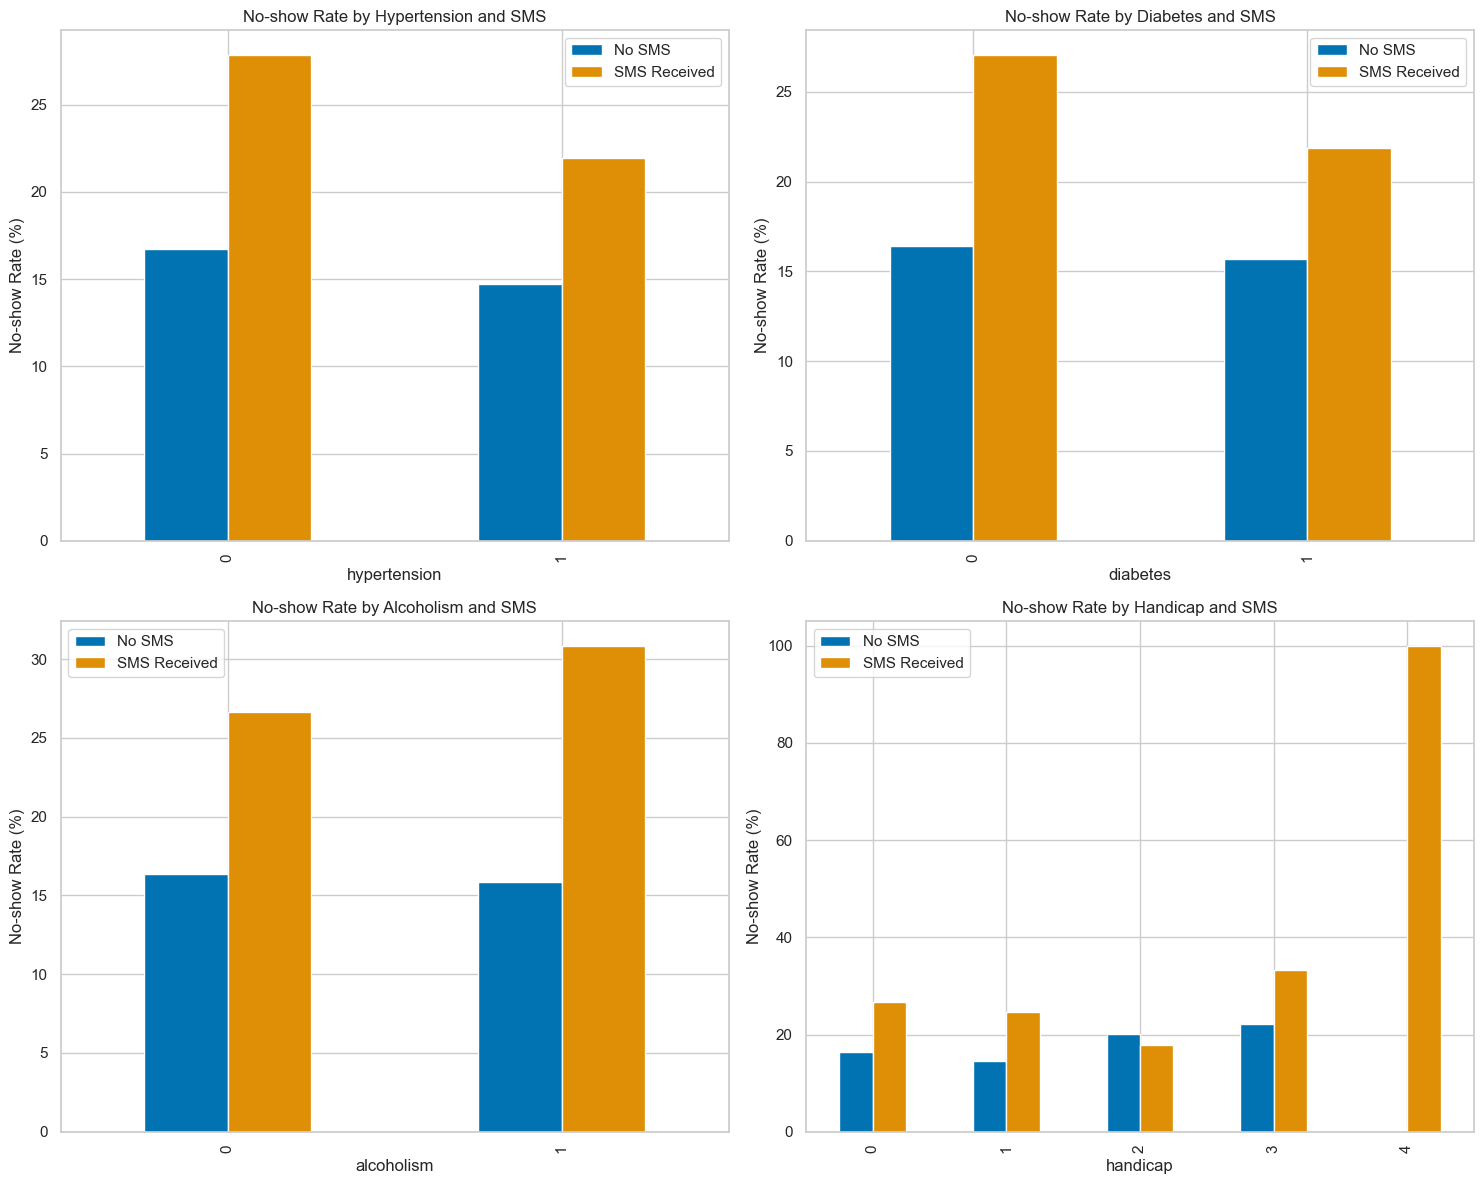

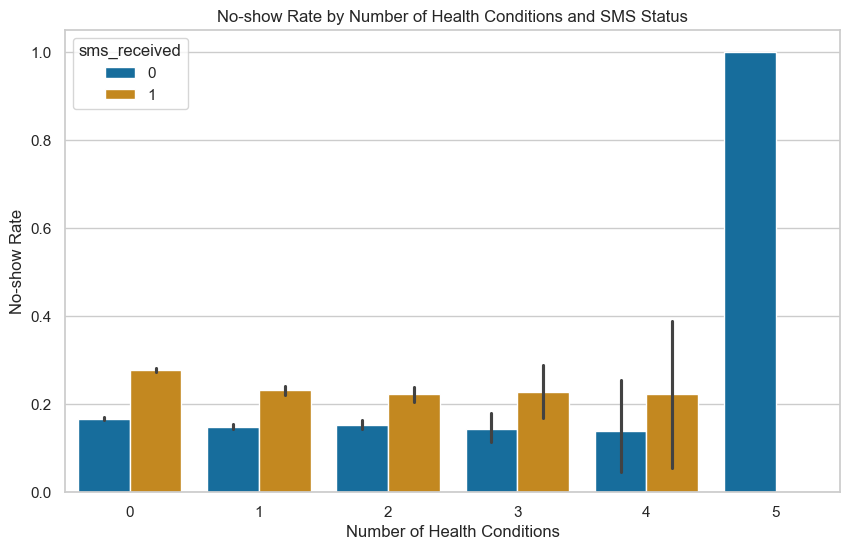

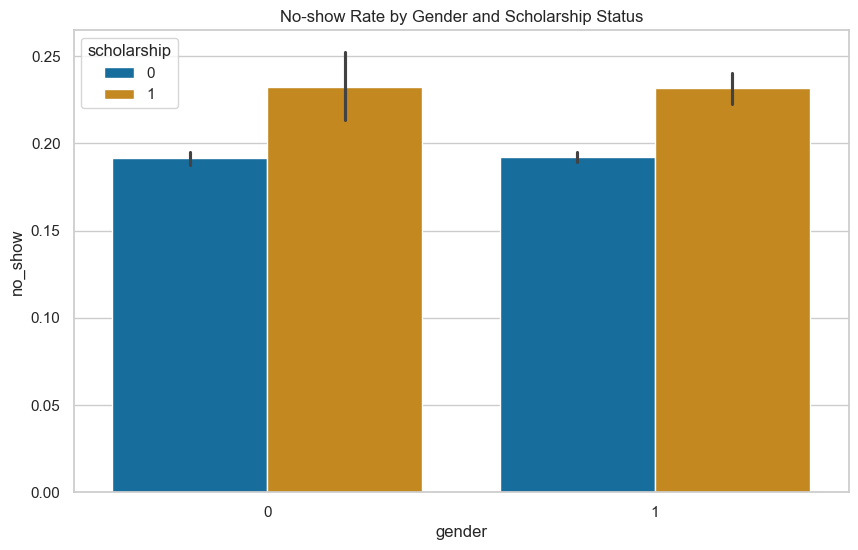

In [87]:
# 1. Health Conditions and SMS Impact
plt.figure(figsize=(15, 10))
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
health_conditions = ['hypertension', 'diabetes', 'alcoholism', 'handicap']

for idx, condition in enumerate(health_conditions):
    row = idx // 2
    col = idx % 2
    
    # Calculate no-show rates for each combination
    pivot_data = df_with_nan.pivot_table(
        values='no_show',
        index=condition,
        columns='sms_received',
        aggfunc='mean'
    ) * 100
    
    # Plot
    pivot_data.plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(f'No-show Rate by {condition.title()} and SMS')
    axes[row, col].set_ylabel('No-show Rate (%)')
    axes[row, col].legend(['No SMS', 'SMS Received'])

plt.tight_layout()
plt.show()

# 2. Combined Health Conditions Analysis
df_with_nan['health_condition_count'] = df_with_nan[health_conditions].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_with_nan, x='health_condition_count', y='no_show', hue='sms_received')
plt.title('No-show Rate by Number of Health Conditions and SMS Status')
plt.xlabel('Number of Health Conditions')
plt.ylabel('No-show Rate')
plt.show()

# 3. Gender and Scholarship Impact
plt.figure(figsize=(10, 6))
sns.barplot(data=df_with_nan, x='gender', y='no_show', hue='scholarship')
plt.title('No-show Rate by Gender and Scholarship Status')
plt.show()

**Interpretation of the multivariate analysis:**
- All conditions show higher no-show rates when SMS is received
- There is not meaningful difference in patients with health conditions.
- Gender does not cause a significant difference in no-show rates when scholarship is observed.

##

## Problem Definition and Business Impact


This dataset could help solve the problem of 'Patient No-show Prediction' in heathcare facilities.


### Business Context:


- Healthcare facilities lose significant revenue from no-shows
- Missed appointments disrupt scheduling efficiency
- Unused medical resources and staff time
- Delayed care for other patients who could have taken those slots

### Practical Application:

- Predict likelihood of patient no-shows
- Enable proactive intervention for high-risk patients
- Optimize appointment scheduling
- Better resource allocation

## Recommended ML Solution


- Use a classification algorithm to predict 'no-show'
- CatBoostClassifier can be used as a classifier since it can handle categorical features automatically
- Schoalrship and sms_received features are the most important features to predict 'no-show'
-  Scheduled_date and appointment_date can be used for spitting the data into training and testing sets
-  Additional features should be engineered to improve the model 
-  Target is unbalanced, so F1 score should be used as a metric